In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn


In [4]:
df = pd.read_csv(r"C:\Users\visha\OneDrive\Scaler Academy\Datasets\churn_logistic.csv")
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [5]:
# Check input variables correlation
# Any signs of multicollinearity
df.corr()

C:\Users\visha\AppData\Local\Temp\ipykernel_49048\1909975411.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code,Churn
Account Length,1.000000,0.011789,0.004564,-0.002186,-0.044533,0.011056,0.008875,0.036037,0.018248,0.032344,0.004566,0.043553,-0.002178,-0.009046,-0.044525,0.022312,0.011036,-0.053540,0.015886
VMail Message,0.011789,1.000000,-0.104007,-0.033322,-0.030805,0.019169,0.012681,0.045794,0.961267,-0.004139,-0.104004,0.003754,-0.033291,0.008852,-0.030863,0.043756,0.019177,0.013022,-0.135798
Day Mins,0.004564,-0.104007,1.000000,0.139616,0.068947,0.006526,-0.189754,0.003526,-0.107875,0.033672,1.000000,0.015095,0.139588,0.051255,0.068926,0.037390,0.006770,-0.027064,0.252872
Eve Mins,-0.002186,-0.033322,0.139616,1.000000,-0.002052,0.003427,-0.091823,0.029898,-0.027109,0.017075,0.139618,0.011644,1.000000,0.043977,-0.002114,-0.015453,0.003376,0.005082,0.124518
Night Mins,-0.044533,-0.030805,0.068947,-0.002052,1.000000,-0.029546,-0.046834,-0.077787,-0.034514,0.016829,0.068944,-0.011866,-0.002053,0.003351,0.999999,-0.004103,-0.029493,-0.001191,0.055394
Intl Mins,0.011056,0.019169,0.006526,0.003427,-0.029546,1.000000,-0.036683,0.158024,0.020768,0.011332,0.006524,-0.007976,0.003414,0.033223,-0.029574,0.037316,0.999993,-0.015421,0.088293
CustServ Calls,0.008875,0.012681,-0.189754,-0.091823,-0.046834,-0.036683,1.000000,-0.065908,0.008368,-0.006075,-0.189754,0.003466,-0.091831,-0.023973,-0.046838,-0.034975,-0.036798,0.012072,0.251015
Intl Plan,0.036037,0.045794,0.003526,0.029898,-0.077787,0.158024,-0.065908,1.000000,0.054449,-0.047392,0.003527,-0.016155,0.029915,0.017933,-0.077805,-0.044742,0.157794,0.050064,0.291062
VMail Plan,0.018248,0.961267,-0.107875,-0.027109,-0.034514,0.020768,0.008368,0.054449,1.000000,-0.004035,-0.107872,0.005710,-0.027085,0.021642,-0.034566,0.043064,0.020793,0.004742,-0.152296
Day Calls,0.032344,-0.004139,0.033672,0.017075,0.016829,0.011332,-0.006075,-0.047392,-0.004035,1.000000,0.033667,0.011825,0.017072,-0.020394,0.016806,0.023909,0.011476,-0.000091,0.014876


C:\Users\visha\AppData\Local\Temp\ipykernel_49048\3301813236.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

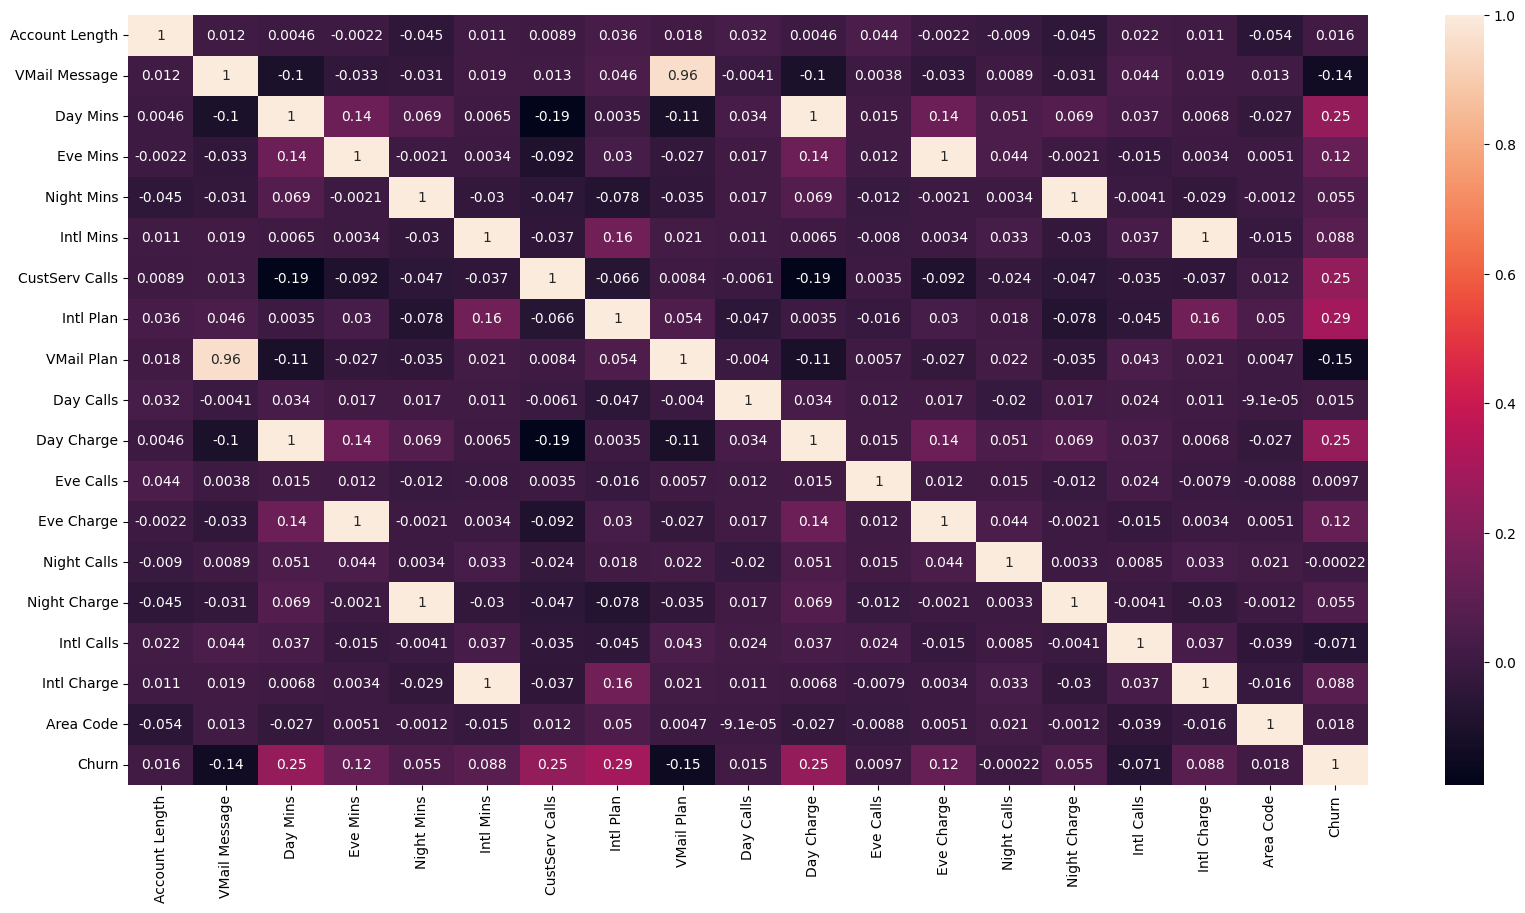

In [6]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)